In [16]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [17]:
# Read the data
path_to_runs = Path("../../results/simulations/withdrawal_queue_replacement/")
# path_to_runs = Path("../../results/simulations/model_validation/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/withdrawal_queue_replacement
True
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/withdrawal_queue_replacement/.DS_Store


In [18]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full, additional_columns=('attacker_share',))
veto_stats['attack_success_rate'] = 100 - veto_stats['veto_rate']
veto_stats['n_successful_attacks'] = veto_stats['attack_success_rate'] / 100 * veto_stats['total_runs']
print("Veto statistics by seal parameters:")
display(veto_stats)

# Example for specific seal values
# veto_seal = 0.01
# rage_seal = 0.1
# attacker_share = veto_stats.index.get_level_values('attacker_share').unique()[0]
# specific_stats = veto_stats.loc[veto_seal, rage_seal, attacker_share]
# print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}, attacker_share={attacker_share:.4f}:")
# print(f"Veto rate: {specific_stats['veto_rate']:.1f}%")
# print(f"Mean time to veto: {specific_stats['mean_time_to_veto']:.2f}")
# print(f"Median time to veto: {specific_stats['median_time_to_veto']:.2f}")
# print(f"Total runs: {specific_stats['total_runs']}")

# veto_stats.to_csv("veto_stats.csv")

Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.25            100.000000   
                                                           0.30            100.000000   
                                                           0.35             98.673469   
                                                           0.40             89.081633   
                                                           0.45             59.285714   
                                                           0.50             18.163265   
                                                           0.55              0.510204   

                                                                           mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                      
0.01                         0.1                           0.25                    28.940000   
                                                           0.30                    30.013913   
                                                           0.35                    31.478800   
                                                           0.40                    33.247423   
                                                           0.45                    35.153184   
                                                           0.50                    37.106742   
                                                           0.55                    37.800000   

                                                                           median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                        
0.01                         0.1                           0.25                           29.0   
                                                           0.30                           30.0   
                                                           0.35                           31.0   
                                                           0.40                           33.0   
                                                           0.45                           35.0   
                                                           0.50                           37.0   
                                                           0.55                           37.0   

                                                                           hours_mean_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                  
0.01                         0.1                           0.25                                86.820000   
                                                           0.30                                90.041739   
                                                           0.35                                94.436401   
                                                           0.40                                99.742268   
                                                           0.45                               105.459552   
                                                           0.50                               111.320225   
                                                           0.55                               113.400000   

                                                                           hours_median_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                    
0.01                         0.1                           0.25                                       87.0   
                                                           0.30                                       90.0   
                                                           0.35                                       93.0   
   

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:350: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  
/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:352: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  """


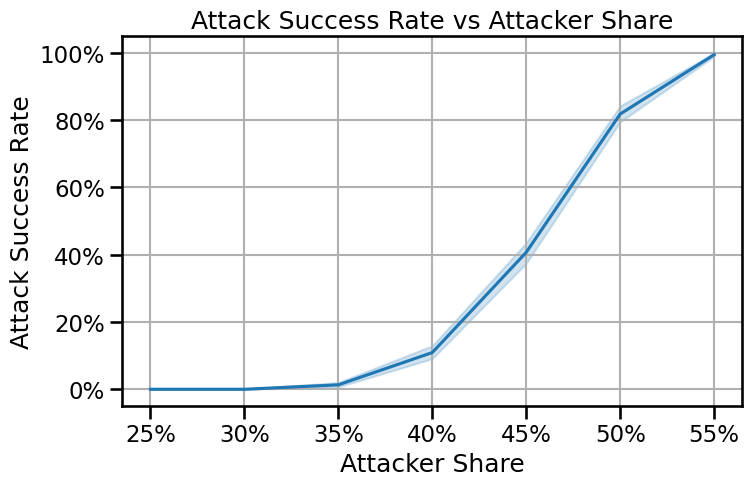

In [12]:
from experiments.analysis_utils.visualization import plot_attack_success_rate
plot_attack_success_rate(timestep_data_df_full, start_data_df_full)

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:402: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


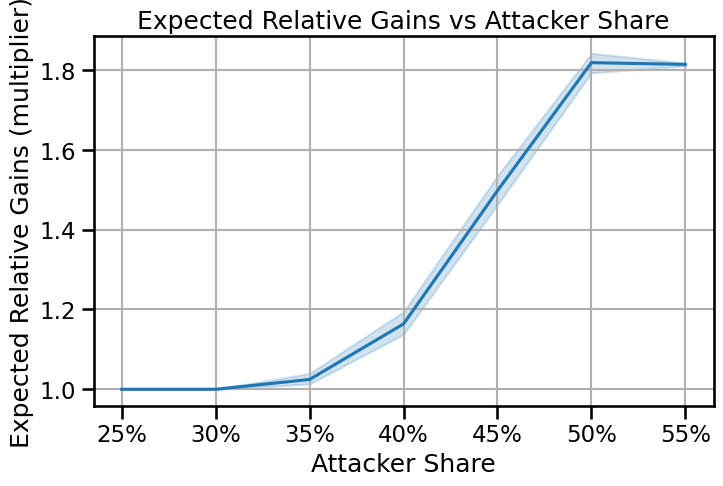

In [15]:
from experiments.analysis_utils.visualization import plot_expected_attacker_gains
plot_expected_attacker_gains(timestep_data_df_full, start_data_df_full)


### End of analysis ###

In [11]:
veto_stats2 = veto_stats.reset_index()
veto_stats2['expected_attacker_gains'] = (1 - veto_stats2['attacker_share']) * veto_stats2['attack_success_rate']
veto_stats2


,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_share,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs,attack_success_rate,n_successful_attacks,expected_attacker_gains
0,0.01,0.1,0.10,100.000000,26.981132,27.0,80.943396,81.0,53,0.000000,0.0,0.000000
1,0.01,0.1,0.20,100.000000,28.340000,28.0,85.020000,84.0,50,0.000000,0.0,0.000000
2,0.01,0.1,0.30,100.000000,30.300000,30.0,90.900000,90.0,50,0.000000,0.0,0.000000
3,0.01,0.1,0.35,99.274311,31.676901,31.0,95.030702,93.0,689,0.725689,5.0,0.471698
4,0.01,0.1,0.40,86.666667,33.343470,33.0,100.030411,99.0,645,13.333333,86.0,8.000000
5,0.01,0.1,0.45,57.984496,35.403743,35.0,106.211230,105.0,645,42.015504,271.0,23.108527
6,0.01,0.1,0.50,6.000000,39.333333,39.0,118.000000,117.0,50,94.000000,47.0,47.000000
7,0.01,0.1,0.55,0.000000,NaN,NaN,NaN,NaN,50,100.000000,50.0,45.000000


In [82]:
timestep_data_df_full_with_params = timestep_data_df_full.merge(
    start_data_df_full[['run_id', 'first_seal_rage_quit_support', 'second_seal_rage_quit_support', 'attacker_share']], 
    on='run_id'
)


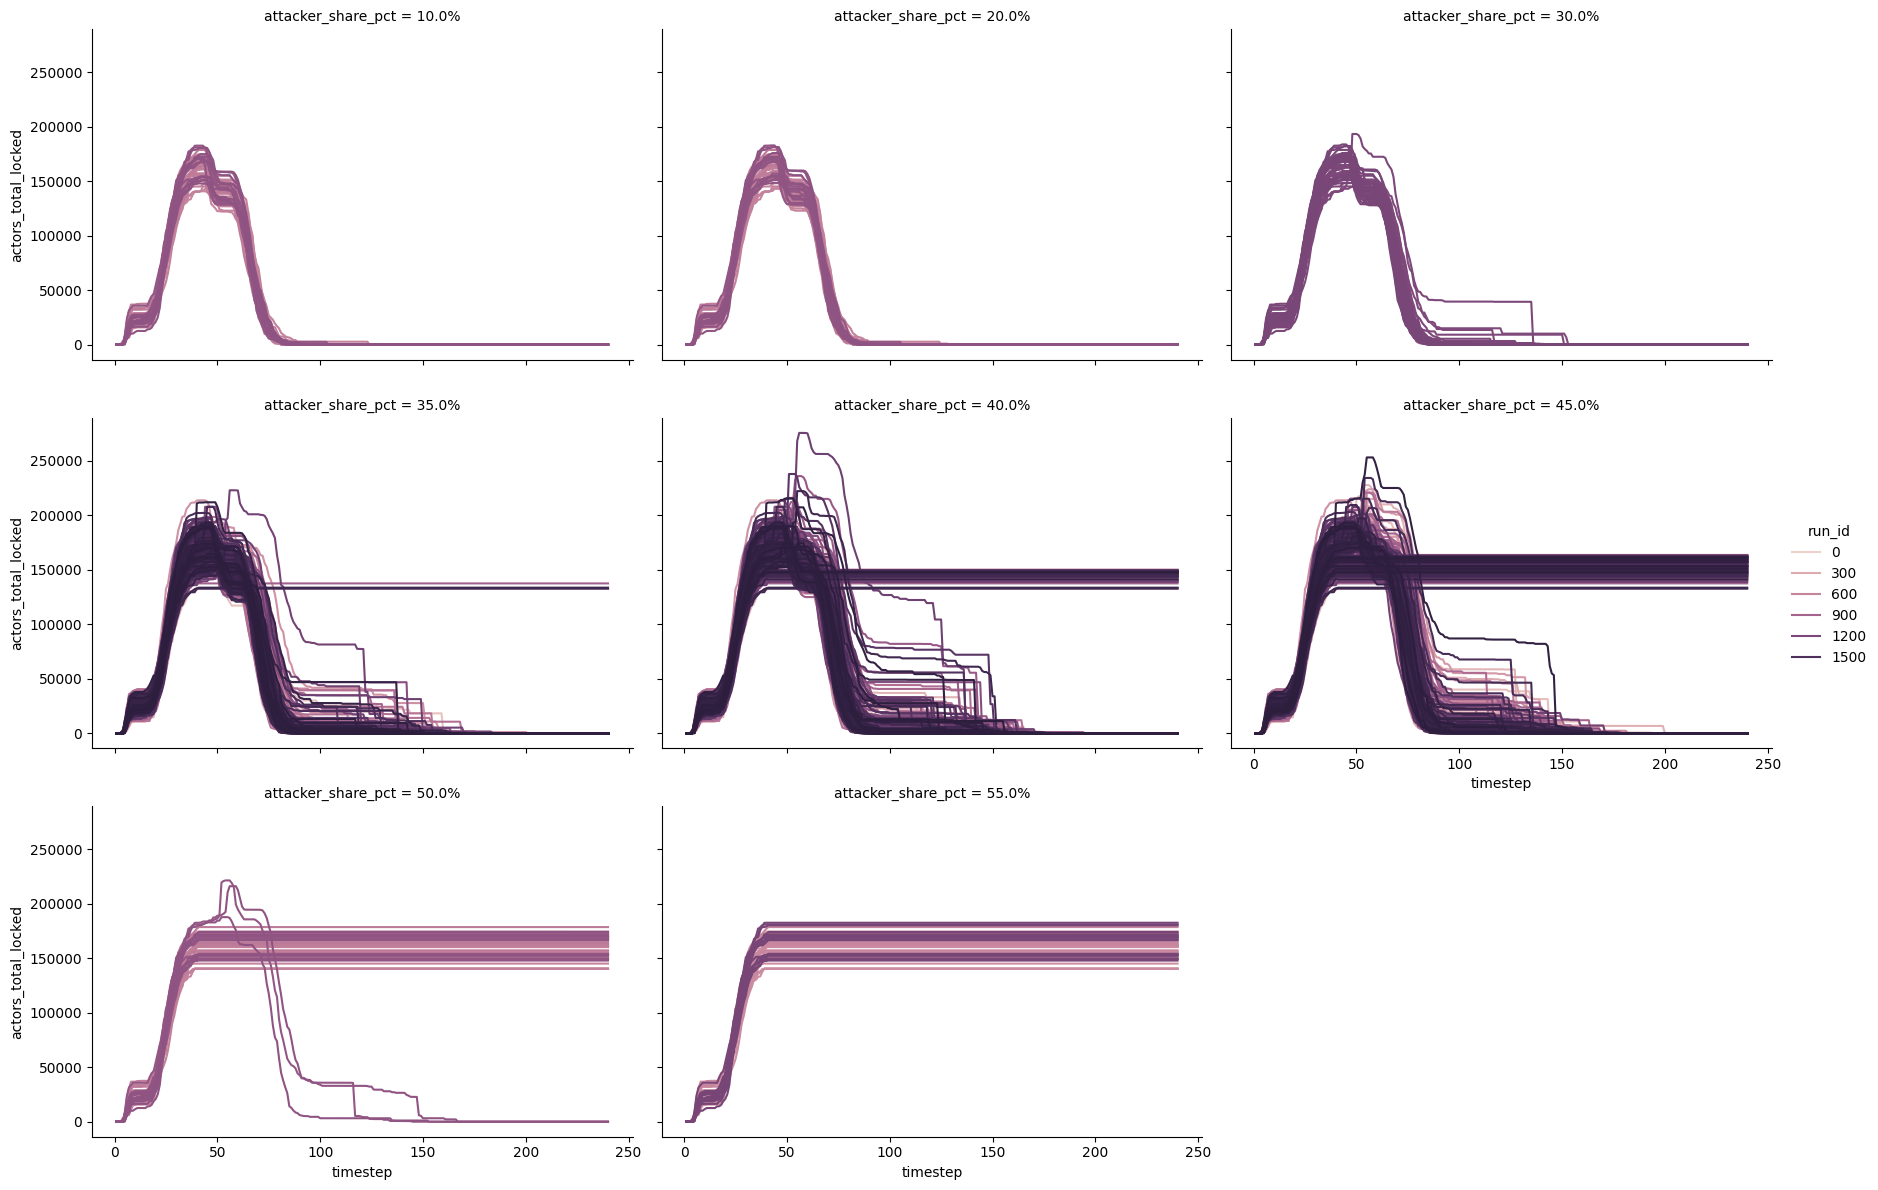

In [83]:
import seaborn as sns
# fig, ax = plt.subplots(figsize=(10, 10))
# Format attacker_share as percentage before plotting
timestep_data_df_full_with_params['attacker_share_pct'] = (timestep_data_df_full_with_params['attacker_share'] * 100).round(1).astype(str) + '%'

col_order = sorted(timestep_data_df_full_with_params['attacker_share_pct'].unique(), key=lambda x: float(x.strip('%')))

# Plot using the formatted column
sns.relplot(
    data=timestep_data_df_full_with_params, 
    x='timestep', 
    y='actors_total_locked', 
    hue='run_id', 
    col='attacker_share_pct',  # Use the formatted column
    kind='line', 
    estimator=None, 
    col_wrap=3,
    height=4,
    aspect=1.5,
    col_order=col_order  # Maintain the order of columns
)
# ax.legend([])
# ax2 = ax.twinx()
# sns.lineplot(data=timestep_data_df_full, x='timestep', y='dg_state_value', ax=ax2, estimator=None, hue='')
# ax2.legend([])

In [84]:
from experiments.analysis_utils.metrics import calculate_time_to_first_veto
veto_times = calculate_time_to_first_veto(timestep_data_df_full)

# Basic statistics
print("Time to first veto statistics:")
print(f"Runs with vetoes: {veto_times['time_to_first_veto'].notna().sum()}")
print(f"Runs without vetoes: {veto_times['time_to_first_veto'].isna().sum()}")
print(f"\nFor runs with vetoes:")
print(f"Mean time to first veto: {veto_times['time_to_first_veto'].mean():.2f}")
print(f"Median time to first veto: {veto_times['time_to_first_veto'].median():.2f}")

# With seal parameters
veto_times_with_params = veto_times.merge(
    start_data_df_full[['run_id', 'first_seal_rage_quit_support', 'second_seal_rage_quit_support']], 
    on='run_id'
)

Time to first veto statistics:
Runs with vetoes: 1377
Runs without vetoes: 363

For runs with vetoes:
Mean time to first veto: 32.55
Median time to first veto: 32.00


In [50]:
timestep_data_df_full_with_first_veto = timestep_data_df_full.merge(
    veto_times_with_params[['run_id', 'time_to_first_veto']], on='run_id', how='left')

pre_veto_states = timestep_data_df_full_with_first_veto[
    timestep_data_df_full_with_first_veto['timestep'] == 
    timestep_data_df_full_with_first_veto['time_to_first_veto'] - 1
]

# Display the results
pre_veto_states

,timestep,simulation_hash,dg_state_value,dg_state_name,dg_rage_quit_support,dg_dynamic_timelock_seconds,actors_total_balance,actors_total_locked,actors_total_number,actors_total_number_locked,...,recovery_CoordinatedDefender,actors_locked_CoordinatedDefender,actors_affected_CoordinatedDefender,actors_quit_CoordinatedDefender,quit_CoordinatedDefender,actors_total_balance_relative,actors_total_locked_relative,actors_total_health_relative,run_id,time_to_first_veto
37,38,805d58e1a879d75b77c6121879d3ca3f1a4d9f64d8cc23...,1,Normal,9994659102271122,0,1.370224e+07,138331.841475,1986,242,...,0,0,0,0,0.0,0.990005,0.009995,1.0,0,39.0
274,35,fdd8594738fe759096d18b78ea17808c7a496d77563e56...,1,Normal,9902299328043760,0,1.619507e+07,161972.352427,1986,242,...,0,0,0,0,0.0,0.990098,0.009902,1.0,1,36.0
749,30,22e2b3ff96cf99b73b2e8c3cd09d81a0cf3e529b2f9864...,1,Normal,9707010077642156,0,1.370623e+07,134350.613214,1986,196,...,0,0,0,0,0.0,0.990293,0.009707,1.0,3,31.0
1230,31,45608c72cdd7793e5dbc4a67aa8f1fac9681440e267428...,1,Normal,9699033055832200,0,1.370634e+07,134240.206635,1986,215,...,0,0,0,0,0.0,0.990301,0.009699,1.0,5,32.0
2437,38,ad68cf9c8f492e2922bc05d4077555ca7ca65240d3d644...,1,Normal,9934008003998170,0,1.370308e+07,137492.395324,1986,215,...,0,0,0,0,0.0,0.990066,0.009934,1.0,10,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93632,33,3bbddc4a12c74e0bc40e093ebcd7154662bed4516a48cc...,1,Normal,9635552435686414,0,1.619944e+07,157609.161593,1986,239,...,0,0,0,0,0.0,0.990364,0.009636,1.0,390,34.0
94109,30,44ed6f94633c8d8c15dbbe4a0ec73ac3ae6af467e5fd06...,1,Normal,9501414193890774,0,1.370907e+07,131505.047707,1986,187,...,0,0,0,0,0.0,0.990499,0.009501,1.0,392,31.0
94833,34,65b1d10c6daf00f9b6944b08604a94f886e3061fc1a260...,1,Normal,9956279814870822,0,1.370278e+07,137800.650021,1986,215,...,0,0,0,0,0.0,0.990044,0.009956,1.0,395,35.0
95309,30,ecced1f52d5e89a6b9aae1eee9b991391ed018f9ad9209...,1,Normal,9990677474657942,0,1.370230e+07,138276.733454,1986,205,...,0,0,0,0,0.0,0.990009,0.009991,1.0,397,31.0


In [85]:
from experiments.analysis_utils.metrics import calculate_pre_first_veto_stats
pre_first_veto_stats = calculate_pre_first_veto_stats(timestep_data_df_full, start_data_df_full)
pre_first_veto_stats

actors_locked_Slow_mean  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                            
0.01                         0.1                           0.10                           0.000000   
                                                           0.20                           0.000000   
                                                           0.30                           0.000000   
                                                           0.35                           0.000000   
                                                           0.40                           0.000000   
                                                           0.45                           0.003378   
                                                           0.50                           0.000000   

                                                                           actors_locked_Slow_median  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                              
0.01                         0.1                           0.10                                  0.0   
                                                           0.20                                  0.0   
                                                           0.30                                  0.0   
                                                           0.35                                  0.0   
                                                           0.40                                  0.0   
                                                           0.45                                  0.0   
                                                           0.50                                  0.0   

                                                                           actors_locked_Slow_std  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                           
0.01                         0.1                           0.10                          0.000000   
                                                           0.20                          0.000000   
                                                           0.30                          0.000000   
                                                           0.35                          0.000000   
                                                           0.40                          0.000000   
                                                           0.45                          0.058124   
                                                           0.50                          0.000000   

                                                                           actors_locked_Normal_mean  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                              
0.01                         0.1                           0.10                           107.400000   
                                                           0.20                           127.580000   
                                                           0.30                           151.200000   
                                                           0.35                           164.470707   
                                                           0.40                           180.607390   
                                                           0.45                           197.466216   
                                                           0.50                           224.666667   

                                                                           actors_locked_Normal_median  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                
0.01                         0.1                           0.10                                  109.5   
                                                      

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(label.get_text())*100:.2f}%' for label in current_labels])


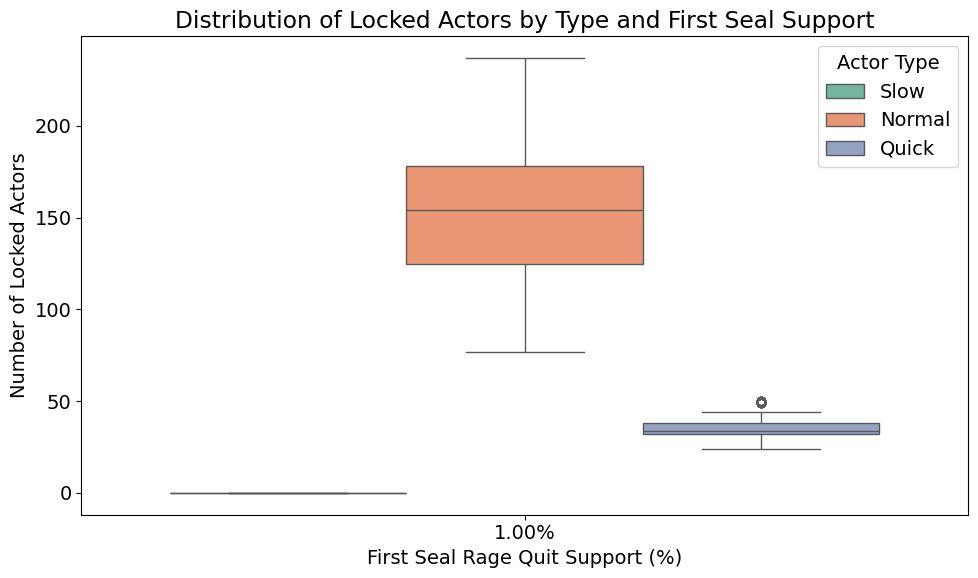

In [74]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions
plot_pre_veto_locked_by_reaction_time_distributions(timestep_data_df_full, start_data_df_full)



/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(label.get_text())*100:.2f}%' for label in current_labels])


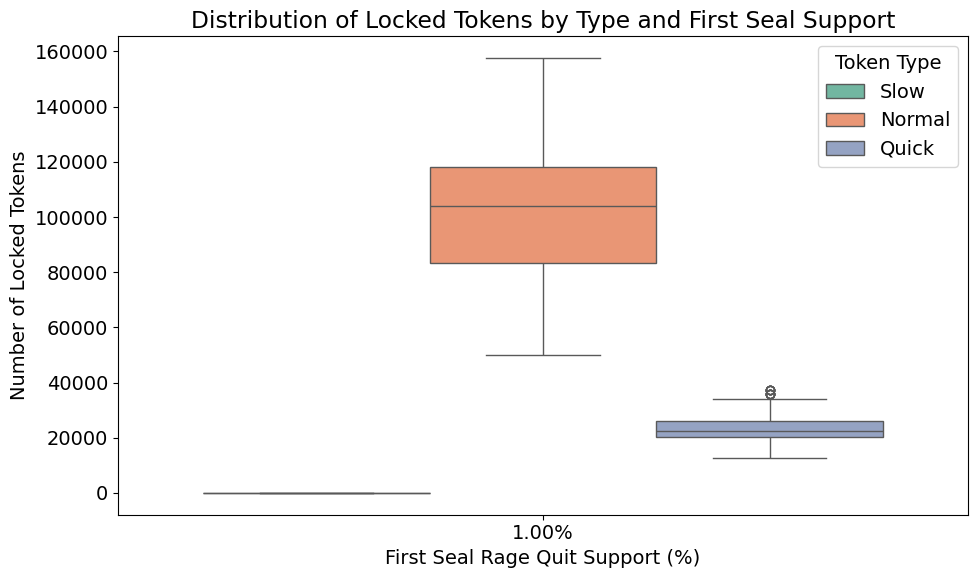

In [75]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions
plot_pre_veto_locked_by_reaction_time_distributions(timestep_data_df_full, start_data_df_full, plot_token_distribution=True)



Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.10            100.000000   
                                                           0.20            100.000000   
                                                           0.30            100.000000   
                                                           0.35             99.000000   
                                                           0.40             87.474747   
                                                           0.45             59.797980   
                                                           0.50              6.000000   
                                                           0.55              0.000000   

                                                                           mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                      
0.01                         0.1                           0.10                    27.040000   
                                                           0.20                    28.340000   
                                                           0.30                    30.300000   
                                                           0.35                    31.565657   
                                                           0.40                    33.200924   
                                                           0.45                    35.175676   
                                                           0.50                    39.333333   
                                                           0.55                          NaN   

                                                                           median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                        
0.01                         0.1                           0.10                           27.0   
                                                           0.20                           28.0   
                                                           0.30                           30.0   
                                                           0.35                           31.0   
                                                           0.40                           33.0   
                                                           0.45                           35.0   
                                                           0.50                           39.0   
                                                           0.55                            NaN   

                                                                           hours_mean_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                  
0.01                         0.1                           0.10                                81.120000   
                                                           0.20                                85.020000   
                                                           0.30                                90.900000   
                                                           0.35                                94.696970   
                                                           0.40                                99.602771   
                                                           0.45                               105.527027   
                                                           0.50                               118.000000   
                                                           0.55                                      NaN   

                                                                           hours_median_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_s


Statistics for veto_seal=0.01, rage_seal=0.1, attacker_share=0.1000:
Veto rate: 100.0%
Mean time to veto: 27.04
Median time to veto: 27.00
Total runs: 50.0


/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:346: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in current_values])


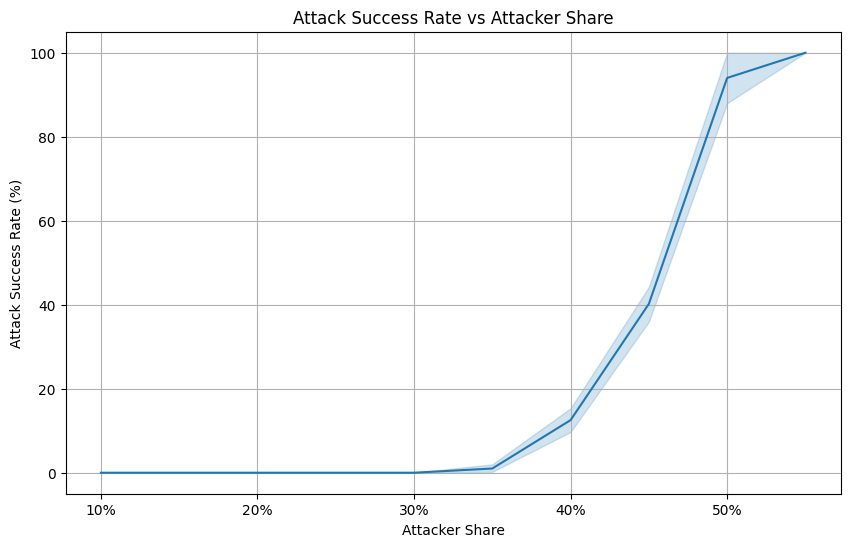

In [106]:
1055 / 1500

0.7033333333333334

In [98]:
total_balance = 8996374.56750506
veto_stats_2 = veto_stats.reset_index()
veto_stats_2['expected_attacker_gains'] = veto_stats_2['attack_success_rate'] / 100 * total_balance * (1 - veto_stats_2['attacker_share'])
veto_stats_2['expected_attacker_relative_gains'] = veto_stats_2['expected_attacker_gains'] / (veto_stats_2['attacker_share'] * total_balance)
veto_stats_2


,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_share,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs,attack_success_rate,n_successful_attacks,expected_attacker_gains,expected_attacker_relative_gains
0,0.01,0.1,0.10,100.000000,27.040000,27.0,81.120000,81.0,50,0.000000,0.0,0.000000e+00,0.000000
1,0.01,0.1,0.20,100.000000,28.340000,28.0,85.020000,84.0,50,0.000000,0.0,0.000000e+00,0.000000
2,0.01,0.1,0.30,100.000000,30.300000,30.0,90.900000,90.0,50,0.000000,0.0,0.000000e+00,0.000000
3,0.01,0.1,0.35,99.000000,31.565657,31.0,94.696970,93.0,500,1.000000,5.0,5.847643e+04,0.018571
4,0.01,0.1,0.40,87.474747,33.200924,33.0,99.602771,99.0,495,12.525253,62.0,6.760912e+05,0.187879
5,0.01,0.1,0.45,59.797980,35.175676,35.0,105.527027,105.0,495,40.202020,199.0,1.989198e+06,0.491358
6,0.01,0.1,0.50,6.000000,39.333333,39.0,118.000000,117.0,50,94.000000,47.0,4.228296e+06,0.940000
7,0.01,0.1,0.55,0.000000,NaN,NaN,NaN,NaN,50,100.000000,50.0,4.048369e+06,0.818182


In [88]:
from experiments.analysis_utils.metrics import calculate_proposal_stats_by_seals
stats_by_seals = calculate_proposal_stats_by_seals(proposal_df_full, start_data_df_full)
print("Proposal statistics by seal parameters:")
display(stats_by_seals)

# # Example for specific seal values
# veto_seal = 0.01
# rage_seal = 0.1
# specific_stats = stats_by_seals.loc[veto_seal, rage_seal]
# print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
# print(f"Total proposals: {specific_stats['total_proposals']}")
# for status, percentage in specific_stats.items():
#     if status != 'total_proposals':
#         print(f"{status}: {percentage:.1f}%")

Proposal statistics by seal parameters:


total_proposals  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                    
0.01                         0.1                           0.10                         51   
                                                           0.20                         50   
                                                           0.30                         50   
                                                           0.35                        561   
                                                           0.40                        545   
                                                           0.45                        545   
                                                           0.50                         50   
                                                           0.55                         50   

                                                                            Cancelled  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.10            100.000000   
                                                           0.20            100.000000   
                                                           0.30            100.000000   
                                                           0.35             99.108734   
                                                           0.40             87.155963   
                                                           0.45             59.082569   
                                                           0.50              6.000000   
                                                           0.55              0.000000   

                                                                             Executed  
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share              
0.01                         0.1                           0.10              0.000000  
                                                           0.20              0.000000  
                                                           0.30              0.000000  
                                                           0.35              0.891266  
                                                           0.40             12.844037  
                                                           0.45             40.917431  
                                                           0.50             94.000000  
                                                           0.55            100.000000

<Axes: title={'center': 'Actors reaction speed'}>

<Figure size 1000x800 with 0 Axes>

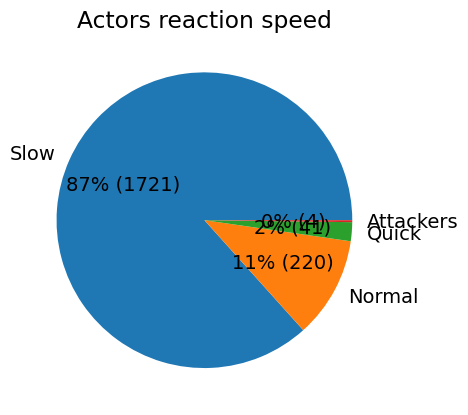

In [42]:
# Get data for a single run (using first run as example)
run_id = start_data_df_full['run_id'].iloc[0]

# Create the plot
plt.figure(figsize=(10, 8))
plot_reaction_speed_distribution(start_data_df_full, run_id=run_id)
# plt.show()

<Axes: title={'center': 'Tokens by reaction speed'}>

<Figure size 1000x800 with 0 Axes>

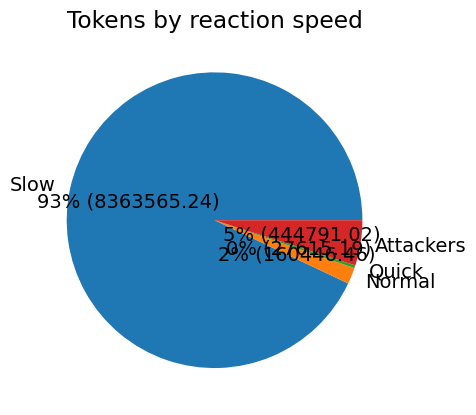

In [43]:
plt.figure(figsize=(10, 8))
plot_token_distribution(timestep_data_df_full, run_id=run_id)